<a href="https://colab.research.google.com/github/SebastienBienfait/L2C-Data-managment/blob/main/7_1_Visualisation_with_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing data visually
---

There are a good number of libraries available containing functions for visualising data with bar charts, pie charts, line plots, box plots, scatter plots and, in some libraries, with more image based visualisations.

To keep it relatively simple, we will use **matplotlib**, a widely used library with a wide range of visualisation functions for data sets and mathematical equations.  It has the main functions we will use in this course:
*  bar charts
*  pie charts
*  line plots
*  box plots
*  scatter plots
*  histogram

Each requires these things:  
1. Select the data columns to be plotted 
2. Prepare the data (remove null values, clean formats, etc)  
3. Run the function for the required plot

Once you have the hang of these, you can start to look at labelling, colouring, etc.

In order to begin creating visualisations, you need to:  
* import **matplotlib** as **plt**

Test output for Exercises 1 to 7 is in this [image](https://drive.google.com/file/d/1yuuDSBI2gES2ipRWTa8XAycNqVd2Eqov/view?usp=sharing)

# IMPORTANT
---
There has been an upgrade to a library needed for reading Excel files in a notebook.  To ensure that you have this upgrade, run the code in the cell below and then select 'Restart runtime' from the Runtime menu.

In [2]:
!pip install --upgrade openpyxl

#  Bar charts and Line Plots
---

For these exercises, use the Excel data file:

'public-use-talent-migration' looking at sheet_name 'Country Migration'  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true 

**Example**:  

Watch the video [here](https://drive.google.com/file/d/1eNOy7fhkB2CSfVdb66kqB66qXfoPfOpd/view?usp=sharing) - demonstration of creating a bar chart using the `matplotlib` library `pyplot`.  Then have a go at creating it yourself.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def import_test_null_excel(url,sheetname):
  df = pd.read_excel(url, sheet_name = sheetname)
  print(df.info())

  for i in df.columns:
    if df[i].isnull().values.any() == True:
      print(i,"has",df[i].isnull().values.sum() ," null values")
  return df
df = import_test_null_excel( "https://github.com/SebastienBienfait/L2C-Data-managment/blob/main/Datasets/public_use-talent-migration.xlsx?raw=true", "Country Migration" )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4148 entries, 0 to 4147
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   base_country_code         4148 non-null   object 
 1   base_country_name         4148 non-null   object 
 2   base_lat                  4148 non-null   float64
 3   base_long                 4148 non-null   float64
 4   base_country_wb_income    4148 non-null   object 
 5   base_country_wb_region    4148 non-null   object 
 6   target_country_code       4148 non-null   object 
 7   target_country_name       4148 non-null   object 
 8   target_lat                4148 non-null   float64
 9   target_long               4148 non-null   float64
 10  target_country_wb_income  4148 non-null   object 
 11  target_country_wb_region  4148 non-null   object 
 12  net_per_10K_2015          4148 non-null   float64
 13  net_per_10K_2016          4148 non-null   float64
 14  net_per_

### Exercise 1 - Line plot of net migration 
--- 

Creating a line plot of mean net migration over the years 2015 to 2019

* create a new dataframe containing only the five columns holding net migration
* create a new data variable to hold the means of the five columns
* create a labels variable to hold the keys (column headings) 
* use plt.plot(x, y) to plot your line chart

***Presentation tips:***   
Plot the chart, then add formatting, then show the plot   

Rotate the x-axis labels in the plot:  
`plt.xticks(rotation=45)`  

Show the grid:  
`plt.grid()`  

When all formatting has been done, show the plot:   
`plt.show()`

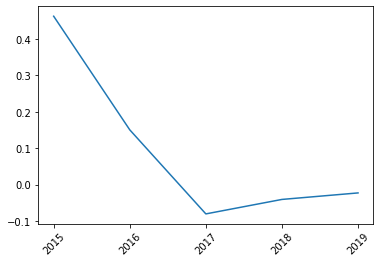

In [4]:
into_array = lambda x: df[x].to_numpy()


arr_net_2015 = into_array("net_per_10K_2015")
arr_net_2016 = into_array("net_per_10K_2016")
arr_net_2017 = into_array("net_per_10K_2017")
arr_net_2018 = into_array("net_per_10K_2018")
arr_net_2019 = into_array("net_per_10K_2019")

 
group_net = [ arr_net_2015, arr_net_2016, arr_net_2017, arr_net_2018, arr_net_2019 ]

arr_group_mean = np.zeros(5)
arr_year = np.array([ 2015, 2016, 2017, 2018, 2019 ], dtype = int)


def find_mean(list1):
  for i in range(5):
    arr_group_mean[i] = group_net[i].mean()
find_mean(group_net)


plt.plot(arr_year, arr_group_mean)
plt.xticks(arr_year,rotation=45) ### using the x-axis in plt.xticks you can specify that only these values are shown explicitly and doesnt dynmaically creat an x-axis label from the given data.
plt.show()

### Exercise 2 - Creating a Bar chart for yearly migration
---
Create a bar chart which shows the total net migration for the years 2015-2019  
 
* split the migration columns into a new dataframe
* create a data variable from the max() of the five columns
* create a labels variable, this time just create a list of the 5 years ['2015','2016','2017','2018','2019']
* plot the bar chart

***Presentation tips***:
* use plt.xlabel('Year') and plt.ylabel('Total net migration') to name your axis 
* display your bar graph with plt.show() 

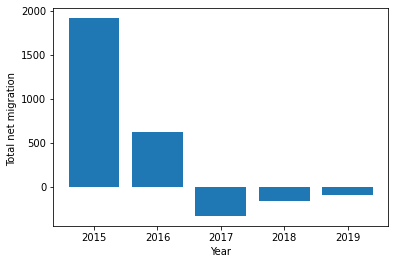

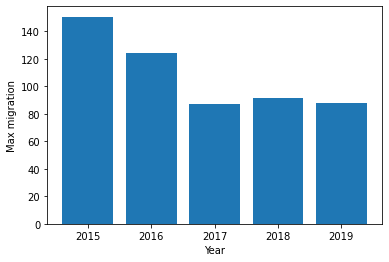

In [5]:
def creat_migration_df(): #df["net_per_10K_2015"],  df["net_per_10K_2016"],  df["net_per_10K_2017"],  df["net_per_10K_2018"], df["net_per_10K_2019"]
  #df_temp = pd.DataFrame({"net_per_10K_2015" : arr_net_2015.tolist(), "net_per_10K_2016" : arr_net_2016.tolist(), 
   #                      "net_per_10K_2017" : arr_net_2017.tolist(), "net_per_10K_2018" : arr_net_2018.tolist(), 
    #                     "net_per_10K_2019" : arr_net_2019.tolist() } )#, columns = [ "net_per_10K_2015", "net_per_10K_2016", "net_per_10K_2017", "net_per_10K_2018", "net_per_10K_2019" ]) 
  df_temp = df[["net_per_10K_2015", "net_per_10K_2016", "net_per_10K_2017", "net_per_10K_2018", "net_per_10K_2019"]].copy() ### <good way ^bad way
  return df_temp

df_net_migration = creat_migration_df()
sum_list = []
max_list = []

for i in df_net_migration.columns:
  sum_list.append(df_net_migration[i].sum())
  max_list.append(df_net_migration[i].max())

plt.bar(arr_year, sum_list)
plt.xlabel("Year")
plt.ylabel("Total net migration ")
plt.show()

plt.bar(arr_year, max_list)
plt.xlabel("Year")
plt.ylabel("Max migration")
plt.show()

### Exercise 3 - creating a bar graph using grouped data 
---

Create a horizontal bar chart of 2019 mean immigration for each income level ('`target_country_wb_income`')

* create a data variable which contains the means, grouped by '`target_country_wb_income`' 
* extract your labels (x) using the .keys() function 
* use the plt.barh(x, y) to create a horizontal bar graph 
* add labels to the axes (eg. 'Net Migration','Income level')  
* show the plot  

Try using plt.bar(x,y) - can you see why horizontally is more appropriate?

pandas.core.indexes.base.Index

pandas.core.indexes.base.Index

array([ True,  True,  True,  True])

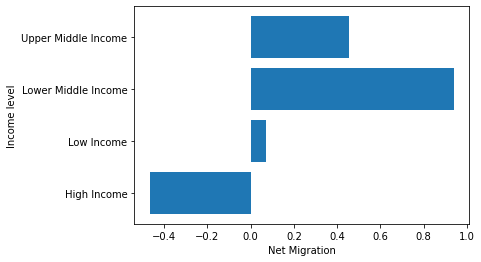

In [6]:
df_income_net_migration = df.groupby("target_country_wb_income").mean()["net_per_10K_2019"]
df_income_net_migration_index_list = df_income_net_migration.index

display(type(df_income_net_migration.keys()),type(df_income_net_migration.index),df_income_net_migration.keys()==df_income_net_migration.index) # .keys() and .index have the same call

plt.barh(df_income_net_migration_index_list, df_income_net_migration)
plt.xlabel("Net Migration")
plt.ylabel("Income level")

plt.show()

# Pie Charts, Box Plots, Scatter Plots and Histograms
---

For these exercises you will use the Psychology dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

To get the data ready:

* read csv file above and save into a new variable called `psych_data`

### Exercise 4 - Creating a pie chart of stress data
---
Create a pie chart which shows how stressed students who speak different languages are.   

To do this:

* similar to Exercise 2 - create a variable which groups the means of data by firstlanguage  
* store the means for 'Stress' in a variable called data
* extract your labels using the keys() function
* plot your pie chart using plt.pie(data, labels = labels)
* write a comment noting anything interesting about the visualisation




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            44 non-null     int64  
 1   English        44 non-null     object 
 2   firstlanguage  18 non-null     object 
 3   sex            44 non-null     object 
 4   origin         44 non-null     object 
 5   Ukresidence    44 non-null     float64
 6   MAAS           44 non-null     float64
 7   Resilliance    44 non-null     int64  
 8   Wellbeing      44 non-null     int64  
 9   Stress         44 non-null     int64  
 10  selfesteem     44 non-null     int64  
 11  LoC            44 non-null     int64  
 12  sleep          44 non-null     int64  
 13  Year           44 non-null     int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 4.9+ KB
None
firstlanguage has 26  null values


,Age,English,firstlanguage,sex,origin,Ukresidence,MAAS,Resilliance,Wellbeing,Stress,selfesteem,LoC,sleep,Year
0,24,Your Second Language,Arabic,Female,Outside Europe,0.0,4.60,44,26,19,22,10,32,2017
1,22,Your Second Language,Arabic,Female,Outside Europe,0.0,2.60,29,10,37,9,16,10,2017
2,26,Your Second Language,Burmese,Female,Outside Europe,0.0,4.13,26,20,20,18,20,24,2017
3,23,Your Second Language,Chinese,Male,Outside Europe,0.0,2.77,30,16,28,20,17,10,2017
4,25,Your Second Language,Chinese,Female,Outside Europe,0.0,3.80,33,27,15,18,12,17,2017
5,24,Your Second Language,Chinese,Male,Outside Europe,2.0,4.40,34,25,21,19,13,17,2017
6,22,Your Second Language,Chinese,Female,Outside Europe,0.0,4.30,37,22,21,19,8,30,2017
7,36,Your Second Language,Chinese,Female,Outside Europe,0.5,3.33,41,25,26,18,12,4,2017
8,22,Your Second Language,Chinese,Female,Outside Europe,0.0,2.60,29,20,28,20,10,20,2017
9,22,Your Second Language,Chinese,Female,Outside Europe,0.0,2.40,35,24,19,19,17,24,2017


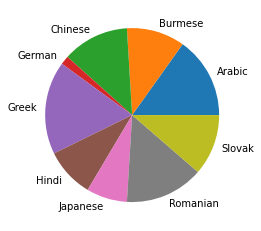

In [20]:
into_array = lambda a,x: a[x].to_numpy()

def import_test_null_csv(url):
  df = pd.read_csv(url)
  print(df.info())

  for i in df.columns:
    if df[i].isnull().values.any() == True:
      print(i,"has",df[i].isnull().values.sum() ," null values")
  return df

df_psych_data = import_test_null_csv("https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true")
display(df_psych_data)

df_group_language = df_psych_data.groupby("firstlanguage").mean()

arr_stress_group = into_array(df_group_language, "Stress")
df_group_language_index = df_group_language.index.to_numpy()


plt.pie(arr_stress_group, labels = df_group_language_index)
plt.show()

### Exercise 5 - Creating a box plot of Wellbeing
---
A box plot is used to visualise summary infomation about a data series such as the min, max and median. 

Create a box plot of the Wellbeing scores

*  split off the wellbeing column  
*  use plt.boxplot(data, labels=["Wellbeing"]) to create the boxplot 
*  show the boxplot

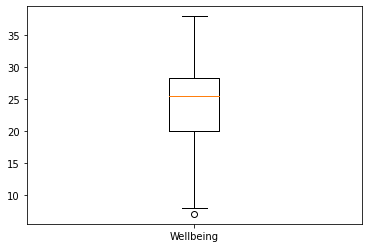

In [15]:
df_psych_well = df_psych_data["Wellbeing"].copy

arr_well = into_array(df_psych_data,"Wellbeing")

plt.boxplot(arr_well,labels=["Wellbeing"])
plt.show()

### Exercise 6 - Histograms of  age 
---

Create a histogram which shows the frequency distribution for '`Wellbeing`'.

* split the `Wellbeing` column off to provide the data
* plot the histogram using `plt.hist(data)` 
* add labels using `plt.xlabel()` and `plt.ylabel()`
* change the colours of the bars - try plt.hist(x, color = 'red')
* show the plot


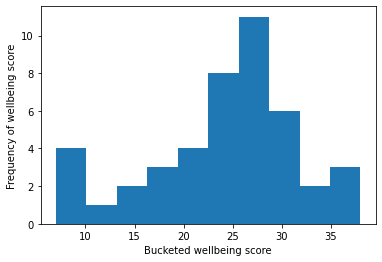

In [19]:
plt.xlabel("Bucketed wellbeing score")
plt.ylabel("Frequency of wellbeing score")
plt.hist(arr_well)
plt.show()

### Exercise 7 - Create a scatterplot of Wellbeing and Stress with line of best fit
---

Assuming that Stress is fairly closely associated with Wellbeing:

Create a scatterplot of Wellbeing and Stress data.

* create **x** from the `Stress` column
* create *y* from the `Wellbeing` column
* use `plt.scatter(x,y)` to create a scatterplot
* add x axis and y axis labels using `plt.xlabel('Stress')` and `plt.ylabel('Wellbeing')`
*  

Adding a line of best fit:   
* the code cell below already has the linregress function imported from the scipy.stats library
* create a regression variable and assign the result of using linregress (`regression = linregress(x,y)` )
* store the slope and intercept (`slope = regression.slope`, `intercept = regression.intercept`)
* plot a line using `plt.plot(x, slope*x + intercept)` 

Show the plots.

Write a short data story ( a description of the data.  What conclusion could be reached from the chart?  How confident could you be in this conclusion and why?




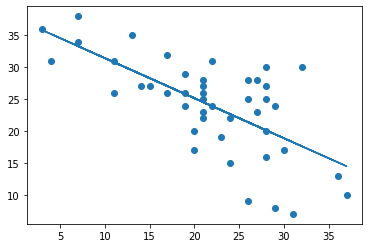

In [30]:
from scipy.stats import linregress

arr_stress = into_array(df_psych_data,"Stress")

def create_histagram():
  regression = linregress(arr_stress,arr_well)
  slope = regression.slope
  intercept = regression.intercept

  plt.scatter(arr_stress,arr_well)
  plt.plot(arr_stress,arr_stress*slope+intercept)

create_histagram()

### Exercise 8 - Create a set of charts from a data set
---
Use the student exam scores dataset here: https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/student_scores.csv

Investigate the data and create a set of charts.  

Create each chart in a new code cell.

Add a text cell below each visualisation to explain what the chart is showing.


# Further reference on w3schools

[Matplotlib on w3schools](https://www.w3schools.com/python/matplotlib_intro.**asp**)